## **Read Seed Files and Select Time Window**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import obspy 
from obspy import read
from obspy import UTCDateTime


Read, print file header and plot complete file
Assumption: SEED files contains three component data, hence three traces.


3 Trace(s) in Stream:
BK.BK63.00.HHE | 2020-10-20T00:00:00.000470Z - 2020-10-20T23:59:59.990470Z | 100.0 Hz, 8640000 samples
BK.BK63.00.HHN | 2020-10-20T00:00:00.000470Z - 2020-10-20T23:59:59.990470Z | 100.0 Hz, 8640000 samples
BK.BK63.00.HHZ | 2020-10-20T00:00:00.000470Z - 2020-10-20T23:59:59.990470Z | 100.0 Hz, 8640000 samples


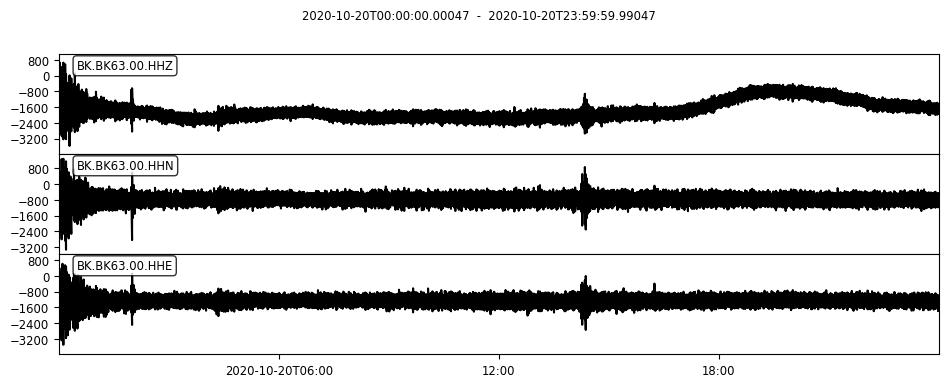

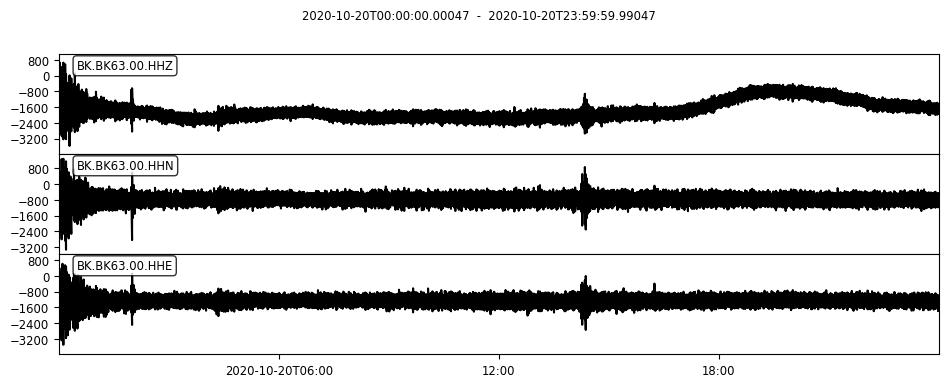

In [2]:
st = read("./../Instr Test/*294")
print(st.__str__(extended=True))

tr0=st[0]
"""
tr1=st[1]
tr2=st[2]
print (tr0.stats)
print (tr1.stats)
print (tr2.stats)
"""

#create overview plot of all traces over full length of file
st.plot(color='black',size=(1000,400),equal_scale=True)

**Select time window** for further analysis, by 
- setting start time in variable "eqtime" in UTC notation and
- setting the length of the window in seconds in varibale "end"

Then plot seismogram of that time window. Then ask if you want to write a file containing a new stream "ev" with only the selected section of the original file. Filename and path are set in line "ev.write".

2020-10-20T00:00:00.000470Z 2020-10-20T23:59:59.990470Z
************************
2020-10-20T00:00:00.000470Z 2020-10-20T18:09:00.000000Z 2020-10-20T00:00:00.000470Z
2020-10-20T00:00:00.000470Z 2020-10-20T18:09:00.000000Z 65339.99953 65429.99953
3 Trace(s) in Stream:
BK.BK63.00.HHE | 2020-10-20T18:09:00.000470Z - 2020-10-20T18:10:30.000470Z | 100.0 Hz, 9001 samples
BK.BK63.00.HHN | 2020-10-20T18:09:00.000470Z - 2020-10-20T18:10:30.000470Z | 100.0 Hz, 9001 samples
BK.BK63.00.HHZ | 2020-10-20T18:09:00.000470Z - 2020-10-20T18:10:30.000470Z | 100.0 Hz, 9001 samples
**
**


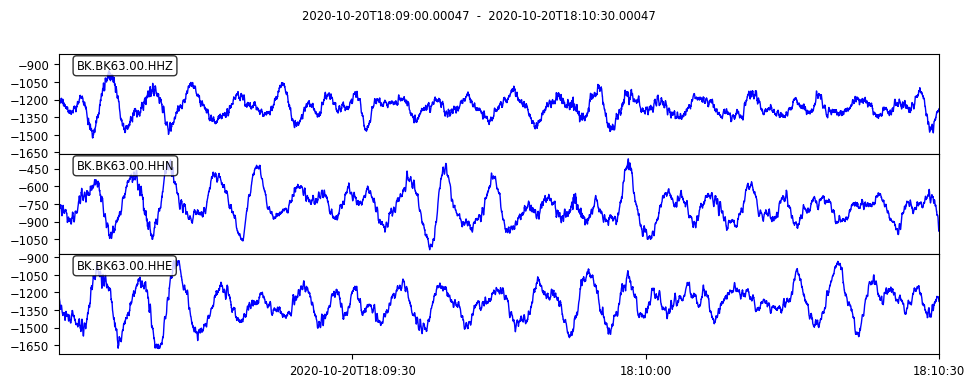

Do you want to save selected time window in a separate file? (yes=1, no=0): 0


In [4]:
dt=st[0].stats.starttime
tend=st[0].stats.endtime
print (dt,tend)

print("************************")

filebegin=UTCDateTime(dt)
endx=UTCDateTime(tend)
eqtime=UTCDateTime("2020-10-20T18:09:00")
print (dt,eqtime,filebegin)
begin=eqtime-filebegin
end=begin+90
print (dt, eqtime, begin, end)
ev = st.slice(starttime=dt+begin, endtime=dt+end)
print (ev)

print ("**")
print ("**")
ev.plot(color= "blue",size=(1000,400),equal_scale=True)

writeyn=int(input("Do you want to save selected time window in a separate file? (yes=1, no=0):"))
if writeyn==1:
    ev.write("./../Instr Test/BK63-Vollmer.", format = "MSEED")
else: print()